<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_practice/blob/main/07_13_04_%EB%B6%84%EC%82%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 일원배치분산분석(ANOVA)

* 4개의 각기 다른 신입사원 교육훈련 기법의 효과성을 평가하고자 한다. 새로 입사한 32명의 신입사원에게 4개 교육기관에서 다른 학습 방법을 적용시켰다. 한달 간의 훈련기간이 끝난 후 시험을 쳤는데 그 점수는 아래와 같다. 4개의 교육훈련 기법 간 차이가 있는가? 만약 있다면 어떻게 다른가

* H0: 교육훈련기법에 따른 효과가 없다.
* H1: 교육훈련기법에 따른 효과가 있다.

In [ ]:
# 패키지 임포트
import pandas as pd
import numpy as np
from scipy import stats
import math
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import bartlett

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# os에 따른 font 깨짐 제거를 위해 font 지정

import os

if os.name == "nt":
    font_family = "Malgun Gothic"
else: #mac os
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 데이터셋

a = [66, 74, 82, 75, 73, 97, 87, 78]
b = [72, 51, 59, 62, 74, 64, 78, 63]
c = [61, 60, 57, 60, 81, 77, 70, 71]
d = [63, 61, 76, 84, 58, 65, 69, 80]

print('a 평균 : ', np.mean(a))
print('b 평균 : ', np.mean(b))
print('c 평균 : ', np.mean(c))
print('d 평균 : ', np.mean(d))

a 평균 :  79.0
b 평균 :  65.375
c 평균 :  67.125
d 평균 :  69.5


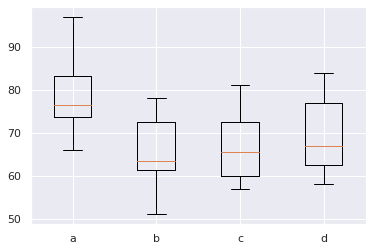

In [ ]:
# 이상값 확인
plot_data = [a,b,c,d]
plt.boxplot(plot_data)
plt.xticks([1, 2, 3, 4],["a", "b", "c", "d"])
plt.grid(True)
plt.show()

In [ ]:
# 데이터프레임 변환

check = ["a", "b", "c", "d"]
check = [check[j] for j in range(4) for i in range(8)]
data = pd.DataFrame({'점수' : a + b + c + d,
                     '교육기관' : check})
data.head()

,점수,교육기관
0,66,a
1,74,a
2,82,a
3,75,a
4,73,a


In [ ]:
## 정규성 검정

print("a 정규성검정 p-value", shapiro(a)[0])
print("b 정규성검정 p-value", shapiro(b)[0])
print("c 정규성검정 p-value", shapiro(c)[0])
print("d 정규성검정 p-value", shapiro(d)[0])

## 유의수준 5% 이내에서 모든 값은 정규성을 만족한다.

a 정규성검정 p-value 0.9516036510467529
b 정규성검정 p-value 0.9632648825645447
c 정규성검정 p-value 0.8988886475563049
d 정규성검정 p-value 0.93294757604599


In [ ]:
print(stats.ks_2samp(a,b),stats.ks_2samp(a,c),stats.ks_2samp(a,d),stats.ks_2samp(b,c),stats.ks_2samp(b,d),stats.ks_2samp(c,d),sep = "\n")

# 유의수준 5% 이내에서 모든 분포는 동일한 분포를 가지고 있다

KstestResult(statistic=0.625, pvalue=0.08702408702408701)
KstestResult(statistic=0.625, pvalue=0.08702408702408701)
KstestResult(statistic=0.5, pvalue=0.2826728826728826)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
KstestResult(statistic=0.25, pvalue=0.98010878010878)


In [ ]:
### 등분산 검정

# lavene 등분산 검정
print(levene(a,b,c,d))

# bartlett 등분산 검정
print(bartlett(a,b,c,d))

# 유의수준 5% 이내에서 모든 분산은 동일하다.

LeveneResult(statistic=0.07560756075607561, pvalue=0.972627101462453)
BartlettResult(statistic=0.07373983712569482, pvalue=0.9947906337756077)


In [ ]:
# f통계량을 이용한 가설 검정

f_statistics, pval = stats.f_oneway(a, b, c, d)

print('F = {0:.1f}, p = {1:.3f}'.format(f_statistics, pval))

if pval < 0.05:
  print("귀무가설 기각, 4개의 교육훈련 기법 간의 차이가 있다")
else : 
  print("귀무가설 채택, 4개의 교육훈련 기법 간의 차이가 없다")

F = 3.5, p = 0.029
귀무가설 기각, 4개의 교육훈련 기법 간의 차이가 있다


In [ ]:
# statsmodel을 사용한 일원배치분산분석

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model_1A = ols("점수 ~ C(교육기관)", data).fit()
anova_lm_result = anova_lm(model_1A)
anova_lm_result

# SSA k-1 = 4 - 1 = 3
# SSE N-k = 32 - 4 = 28
# SST N-1 = 32 - 1 = 31
# MSA / MSW = 295.083333 / 84.741071 = 3.4821

,df,sum_sq,mean_sq,F,PR(>F)
C(교육기관),3.0,885.25,295.083333,3.482176,0.028897
Residual,28.0,2372.75,84.741071,NaN,NaN


In [ ]:
pval = anova_lm_result["PR(>F)"][0]

if pval < 0.05:
  print("귀무가설 기각, 4개의 교육훈련 기법 간의 차이가 있다")
else : 
  print("귀무가설 채택, 4개의 교육훈련 기법 간의 차이가 없다")

귀무가설 기각, 4개의 교육훈련 기법 간의 차이가 있다


In [ ]:
### 사후분석: ANOVA가 유의할때 구체적으로 어느 수준에서 평균 차이가 나는지 검정

from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd = pairwise_tukeyhsd(data.점수, data.교육기관, alpha = 0.05)
hsd.summary()

# a, b와 a, c의 차이가 유의하다.

group1,group2,meandiff,p-adj,lower,upper,reject
a,b,-13.625,0.0298,-26.1919,-1.0581,True
a,c,-11.875,0.0693,-24.4419,0.6919,False
a,d,-9.5,0.1896,-22.0669,3.0669,False
b,c,1.75,0.9,-10.8169,14.3169,False
b,d,4.125,0.7861,-8.4419,16.6919,False
c,d,2.375,0.9,-10.1919,14.9419,False


### 2. 이원배치분산분석

* H0: 강도에 대한 각 판유리와 온도 간에는 상호작용 효과가 없다.
* H1: 강도에 대한 각 판유리와 온도 간에는 상호작용 효과가 있다.

In [ ]:
dat = pd.DataFrame({
    "판유리": ["유리1", "유리1", "유리1", "유리2", "유리2","유리2", "유리3", "유리3",
            "유리3", "유리1", "유리1", "유리1", "유리2", "유리2", "유리2", "유리3",
            "유리3", "유리3", "유리1", "유리1", "유리1", "유리2", "유리2", "유리2", 
            "유리3", "유리3", "유리3"],
    "온도" : [100, 100, 100, 100, 100, 100, 100, 100, 100, 125, 125, 125, 125, 125, 125, 125, 125, 125,
            150, 150, 150, 150, 150, 150, 150, 150, 150],
    "강도" : [580, 568, 570, 550, 530, 579, 546, 575, 599, 1090, 1087, 1085, 1070,
            1035, 1000, 1045, 1053, 1066, 1392, 1380, 1386, 1328, 1312, 1299, 867,
            904, 889]       
})

In [ ]:
dat.head()

,판유리,온도,강도
0,유리1,100,580
1,유리1,100,568
2,유리1,100,570
3,유리2,100,550
4,유리2,100,530


In [ ]:
dat.groupby(["판유리","온도"]).agg(len)
# 판유리 온도 요인으로 구분한 각 집단별 표본 수는 모두 3으로 동일

강도
판유리 온도     
유리1 100   3
    125   3
    150   3
유리2 100   3
    125   3
    150   3
유리3 100   3
    125   3
    150   3

In [ ]:
# 이원배치분산분석

from statsmodels.formula.api import ols

model = ols("강도 ~ C(판유리) * C(온도)", dat).fit()
anova_result = pd.DataFrame(anova_lm(model))
anova_result 

# 판유리 p-value = 3.886026e-13, 판유리의 수준에 따른 강도에 차이가 있다.
# 온도 p-value = 5.008957e-23, 온도의 수준에 따른 강도에 차이가 있다.
# 판소리*온도 p-value = 1.254188e-14, 판유리와 온도의 교호작용에 따른 강도의 차이가 있다.

,df,sum_sq,mean_sq,F,PR(>F)
C(판유리),2.0,1.508645e+05,75432.259259,206.370554,3.886026e-13
C(온도),2.0,1.970335e+06,985167.259259,2695.259499,5.008957e-23
C(판유리):C(온도),4.0,2.905517e+05,72637.925926,198.725707,1.254188e-14
Residual,18.0,6.579333e+03,365.518519,NaN,NaN


In [ ]:
## 사후분석

dat["온도"] = dat["온도"].astype("str")
dat["combi"] = dat.판유리 + "/" + dat.온도
print(pairwise_tukeyhsd(dat["강도"], dat["combi"]))

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower     upper   reject
-----------------------------------------------------------
유리1/100 유리1/125  514.6667  0.001  459.9711  569.3623   True
유리1/100 유리1/150  813.3333  0.001  758.6377  868.0289   True
유리1/100 유리2/100  -19.6667    0.9  -74.3623   35.0289  False
유리1/100 유리2/125  462.3333  0.001  407.6377  517.0289   True
유리1/100 유리2/150  740.3333  0.001  685.6377  795.0289   True
유리1/100 유리3/100    0.6667    0.9  -54.0289   55.3623  False
유리1/100 유리3/125     482.0  0.001  427.3044  536.6956   True
유리1/100 유리3/150     314.0  0.001  259.3044  368.6956   True
유리1/125 유리1/150  298.6667  0.001  243.9711  353.3623   True
유리1/125 유리2/100 -534.3333  0.001 -589.0289 -479.6377   True
유리1/125 유리2/125  -52.3333 0.0671 -107.0289    2.3623  False
유리1/125 유리2/150  225.6667  0.001  170.9711  280.3623   True
유리1/125 유리3/100    -514.0  0.001 -568.6956 -459.3044   True
유리1/125 유리3/125  -32.6667 0.5058  -87.36